CS150A Homework3 -- Coding
=======

### Instructions / Notes:

**_Read these carefully_**

* You may need to install the `sklearn` module to run the scripts.
* You **may** create new Jupyter notebook cells to use for e.g. testing, debugging, exploring, etc.- this is encouraged in fact!
* There will be deductions from your grades if you don't have ouputs when the question requires you to do so. 

### Submission Instructions:
 * Do _NOT_ submit your iPython notebook directly.
 * Instead, upload your answers in PDF version of the HW3.ipynb with your outputs to Gradescope.

 
 **If you hava any confusion, please ask TA team in Piazza.**

_Have fun!_

In [3844]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.metrics import adjusted_rand_score
from sklearn import preprocessing
import pandas as pd
import math
import random

Part 1: Implementation of K-means (70 points)
------------------------
**In this part, you should finish question 1 to 7.**

In the lecture we have learnt about the K-means algorithm, now we need to finish the sectional functions of k-means method, and use it in the following tasks.

The k-means clustering method is an unsupervised machine learning technique used to identify clusters of data objects in a dataset. There are many different types of clustering methods, but k-means is one of the oldest and most approachable. 

Conventional k-means requires only a few steps. The first step is to randomly select k centroids, where k is equal to the number of clusters you choose. Centroids are data points representing the center of a cluster.The main element of the algorithm works by a two-step process called expectation-maximization. The expectation step assigns each data point to its nearest centroid. Then, the maximization step computes the mean of all the points for each cluster and sets the new centroid. 

**Hint: It will be helpful to refer to the pseudocode of K-means in the lecture.**

In [3845]:
X = np.array([[0,2],[0,0],[1,0],[5,0],[5,2]])

Question 1: Definition of Euclidean Distance (10 points)
------------------------

In this question, you should finish the "euclidean_distance" function, where we compute the euclidean distance of two given points.

In [3846]:
def euclidean_distance(x1, x2):
    return math.sqrt((x1[0]-x2[0])**2 + (x1[1]-x2[1])**2)
    
# ----- Write You Code Here ----- #


In [3847]:
print(euclidean_distance(X[0], X[4])==5)

True


Question 2: Initialization of Centroids (10 points)
------------------------

In this question, you should finish the "centroids_init" function. Centroid initialization is class-center initialization, that is, k samples of the dataset are randomly selected for each category for class-center initialization. This process is also the starting point of K-means clustering algorithm.

**input:**  
    X: dataset  
    k: num of centroids  
**output:**  
    return `k * n` matrix of centroids for `m * n` dataset X

In [3848]:
def centroids_init(k, X):
# ----- Write You Code Here ----- #
    res = random.sample(X.tolist(),k)
    return res

In [3849]:
# test
test_centers = centroids_init(3,X)
test_centers

[[5, 0], [0, 2], [0, 0]]

Question 3: Determination of Belonging Centroids (10 points)
------------------------

In this question, you should finish the "closest_centroid" function. This function defines the class index to which the nearest centroid of the sample belongs according to euclidean distances.

**input:**  
    sample: a single sample of X  
    centroids: matrix of centroids  
**output:**  
    return the index of center that the sample belongs to

In [3850]:
def closest_centroid(sample, centroids):
# ----- Write You Code Here ----- #
    smallest = euclidean_distance(sample,centroids[0])
    res = 0
    for i in range(0,len(centroids)):
        if euclidean_distance(sample,centroids[i]) < smallest:
            smallest = euclidean_distance(sample,centroids[i])
            res = i
    return res

In [3851]:
# test
closest_centroid([2,0],X)

2

Question 4: Assignment of Clusters (10 points)
------------------------

In this question, you should finish the "build_clusters" function, where we should assign clusters to each data point. This step is actually the clustering process, that is, each sample is assigned to the nearest class cluster.

**input:**  
    centroids: matrix of centroids
    k: num of centroids  
    X: dataset  
**output:**  
    return the matrix of clusters with index of each assigned sample x_i as item

In [3852]:
def build_clusters(centroids, k, X):
# ----- Write You Code Here ----- #
    res = [[] for i in range(0,k)]
    for i in range(0,len(X)):
        res[closest_centroid(X[i],centroids)].append(i)
    return res

In [3853]:
test_clusters = build_clusters(test_centers, 3, X)
test_clusters

[[3, 4], [0], [1, 2]]

Question 5: Recalculation of Centroids (10 points)
------------------------

In this question, you should finish the "calculate_centroids" function. The core idea of K-means clustering algorithm is to continuously dynamically adjust, recalculate the centroid according to the class cluster generated in the previous step, and then perform the clustering process.

**input:**  
    clusters: the matrix of clusters with index of each assigned sample x_i as item
    k: num of centroids  
    X: dataset  
**output:**  
    return the updated matrix of centroids

In [3854]:
def calculate_centroids(clusters, k, X):
# ----- Write You Code Here ----- #
    values = np.zeros((k,2))
    count = [0]*k
    for i in range(0,len(clusters)):
        for point_index in clusters[i]:
            values[i] += X[point_index]
            count[i] += 1
    values = [((1/count[i])*values[i]).tolist() for i in range(0,k)]
    return values


In [3855]:
calculate_centroids(test_clusters, 3, X)

[[5.0, 1.0], [0.0, 2.0], [0.5, 0.0]]

Question 6: Get Labels (10 points)
------------------------

In this question, you should finish the "get_cluster_labels" function, where we should get the cluster category to which each sample belongs, a.k.a. the labels of each data point.

**input:**  
    clusters: the matrix of clusters with index of each assigned sample x_i as item  
    X: dataset  
**output:**  
    return the predicted labels of X

In [3856]:
def get_cluster_labels(clusters, X):
# ----- Write You Code Here ----- #
    res = [0]*len(X)
    for i in range(0,len(X)):
        for j in range(0,len(clusters)):
            if i in clusters[j]: res[i] = j
    return np.array(res)

In [3857]:
get_cluster_labels(test_clusters, X)

array([1, 2, 2, 0, 0])

Question 7: K-means Clustering (10 points)
------------------------

In this question, you should finish the "mykmeans" function. Define the K-means clustering algorithm flow based on the above functions.

**input:**  
    X: dataset  
    k: num of centroids  
    max_iterations: max time of iterations  
**output:**  
    return the predicted labels of X

**Note: you should exactly finish the following 5 serial parts of the function.**

In [3858]:
def mykmeans(X, k, max_iterations):
# ----- Write You Code Here ----- #
    # 1.Initialize the centroids
    last_centroids = centroids_init(k,X)
    # Iterations
    for i in range(max_iterations):
        # 2.Build clusters according to the current centroids
        clusters = build_clusters(last_centroids, k, X)
        # 3.Compute the new centroids according to the new clustering results
        centroids = calculate_centroids(clusters, k, X)
        # 4.Set the convergence condition as whether the centroids change
        if centroids == last_centroids and i!=0 : break
        last_centroids = centroids
    # 5.Return final labels of each points
    # print('iter times: ',i)
    return get_cluster_labels(clusters, X)


In [3864]:
# comparision for your check
from sklearn.cluster import KMeans
pred1 = mykmeans(X, 2, 100)
pred2 = KMeans(n_clusters=2).fit_predict(X)
print(pred1, pred2)

[1 1 1 0 0] [1 1 1 0 0]


Good for you! Now you can use your K-means functions to do more wonderful things!

In [3860]:
# a fast evaluation test
test = 500
count = 0
for i in range(0,test):
    pred1 = mykmeans(X, 2, 100)
    pred2 = KMeans(n_clusters=2).fit_predict(X)
    res_pd1 = []
    for i in pred1: 
        if i == 0: res_pd1.append(1)
        else: res_pd1.append(0)
    res_pd1 = np.array(res_pd1)
    if pred1.tolist() == pred2.tolist()  or res_pd1.tolist()  == pred2.tolist(): count+=1
print(count/test)


0.798


Part 2: Plots and ARI (10 points)
------------------------

**In this part, you should finish question 8.**

Now you may wonder given the prediction of K-means clustering method, then how to evaluate the results properly. If the ground truth labels are known, it’s possible to use a clustering metric that considers labels in its evaluation. You can use the `scikit-learn` implementation of a common metric called the **adjusted rand index (ARI)**, which uses true cluster assignments to measure the similarity between true and predicted labels. The ARI output values range between -1 and 1. A score close to 0.0 indicates random assignments, and a score close to 1 indicates perfectly labeled clusters. Besides, it would be helpful if we can see the assignment of clusters with **plots**.


Question 8: Reach higher ARI (10 points)
------------------------

In this question, you should tune the parameters `n_clusters` and `max_iters` to see better results of your K-means method, the output ARI should be higher than **0.7** with clear plots.

ARI of K-means with 5 clusters and 3000 max iterations: 0.7090321013591384


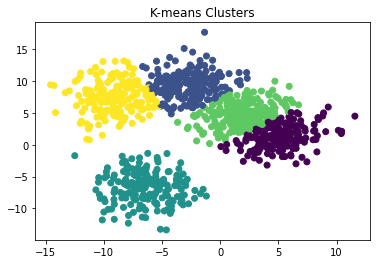

In [3861]:
features = np.genfromtxt('data_x.csv')
true_labels = np.genfromtxt('data_y.csv')
n_clusters = 5
max_iters = 3000

pred = mykmeans(features, n_clusters, max_iters)
plt.plot()
plt.scatter(features[:, 0], features[:, 1], c=pred)
plt.title("K-means Clusters")
ari_kmeans = adjusted_rand_score(true_labels, pred)
print('ARI of K-means with {} clusters and {} max iterations:'.format(n_clusters, max_iters),ari_kmeans)

Part 3: Prediction of Asian Football Teams (20 points)
------------------------

**In this part, you should finish question 9.10.**

Did you watch the recent 2022 World Cup in Qatar? WOW, that would be super exciting! Maybe you are thinking of which football team to celebrate or even pay closer attention to Asian teams. Now imagine that you could have the chance to choose which Asian football teams to be participated in the next round of World Cup with your K-means methods. What a surpise!

In [3868]:
data = pd.read_csv('soccer.csv')
train_x = data[["Country","2019Global","2018WorldCup","2015AsianCup"]]
df = pd.DataFrame(train_x)
df

,Country,2019Global,2018WorldCup,2015AsianCup
0,China,73,40,7
1,Japan,60,15,5
2,SouthKorea,61,19,2
3,Iran,34,18,6
4,Saudi,67,26,10
5,Iraq,91,40,4
6,Qatar,101,40,13
7,UAE,81,40,6
8,Uzbekistan,88,40,8
9,Thailand,122,40,17


Question 9: Choose 5 Teams (10 points)
------------------------

If you are about to choose **5** Asian teams from the pool, which five teams would you choose and why? Please briefly explain your reasons with your clustering results as output.

**Hint: `preprocessing.MinMaxScaler()` function can help for dataset scaling**

Question 10: Choose 9 Teams (10 points)
------------------------

It's announced that the 2026 World Cup wil  allow 48 teams in total. Now, maybe we could choose up to 9 Asian teams to participate in the contest. So if you are about to choose **9** Asian teams from the pool, which **9** teams would you choose and why? Please briefly explain your reasons with your clustering results as output.

**Hint: `preprocessing.MinMaxScaler()` function can help for dataset scaling**